In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
%matplotlib inline

First, let's pull a dataframe containing county-level census data. Specifically, we'll be cleaning it up so that we're looking at the percentage of adults with a bachelor's degree (recorded between 2013 and 2017) for each county.

In [2]:
education = pd.read_csv('data/Education.csv', encoding='ISO-8859-1', header=0)
education = education[['Area name','State', "Percent of adults with a bachelor's degree or higher, 2013-17"]]
education.columns = ['County Name','State', 'Percent_Bachelors_Degree']
education = education.dropna().reset_index(drop=True)

1) Plot a histogram of the percentage of adults with a bachelor's degree or higher. Be sure to properly label the title and axes of the graph.

Text(0.5,0.92,"Distribution of Percentage of Adults with a Bachelor's Degree of higher")

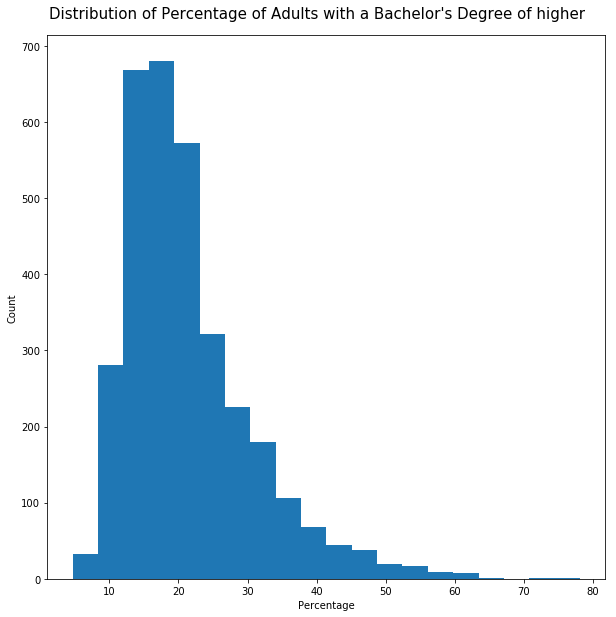

In [3]:
fig = plt.figure(figsize=(10,10))
plt.hist(education['Percent_Bachelors_Degree'], bins=20)
plt.xlabel('Percentage')
plt.ylabel('Count')
fig.suptitle("Distribution of Percentage of Adults with a Bachelor's Degree of higher", fontsize=15, y=0.92)

2) Is this distribution positively skewed, negatively skewed, or unskewed? If it's skewed, use a transformation to unskew it. Try a few until you find a result that looks closest to a normal distribution and plot a histogram of that transformation, again with proper labelling of the title and axes.

Text(0.5,0.92,"Cubic Root of Distribution of Percentage of Adults with a Bachelor's Degree of higher")

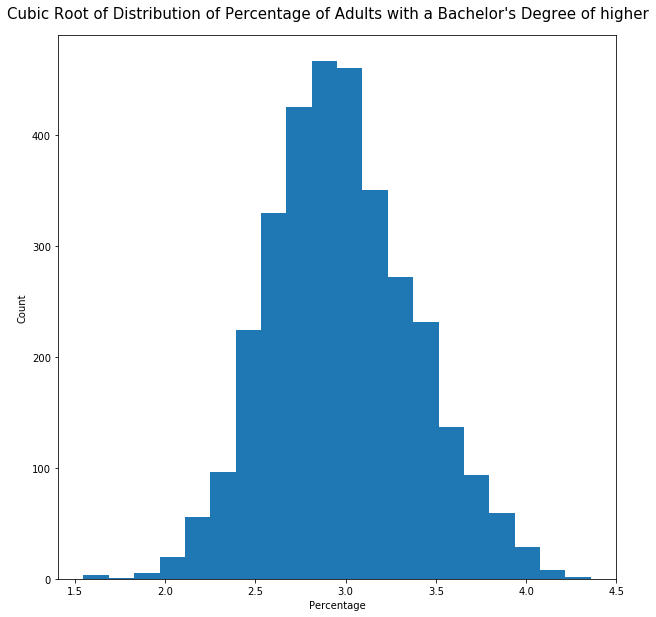

In [4]:
#This distribution is positively skewed
#Transforming to a normal distribution by using cubic root:
fig = plt.figure(figsize=(10,10))
plt.hist(np.log(education['Percent_Bachelors_Degree']), bins=20)
plt.xlabel('Percentage')
plt.ylabel('Count')
fig.suptitle("Cubic Root of Distribution of Percentage of Adults with a Bachelor's Degree of higher", fontsize=15, y=0.92)

Now let's look at this data state-by-state. We'll take the mean value of the percentage of adults with a bachelor degree by state (notice this groupby function, as it may be helpful for aggregating data for your projects).

In [5]:
state_mean = education.groupby('State')['Percent_Bachelors_Degree'].mean().reset_index()
state_mean.head(100)

,State,Percent_Bachelors_Degree
0,AK,22.733333
1,AL,17.517647
2,AR,15.853947
3,AZ,20.381250
4,CA,26.525424
5,CO,30.881538
6,CT,36.633333
7,DC,56.600000
8,DE,28.825000
9,FL,21.635294


3) Which state has the highest average percentage of adults with a bachelor's degree? Which state has the lowest? (Hint: Look at the 'Descriptive Statistics Class Notebook' all the way back from Week 2 for an idea of how to query this in the dataframe)

If you are not familiar with which abbreviation corresponds to which state, use this for reference: https://www.50states.com/abbreviations.htm

In [6]:
#Highest is Washington DC 
np.max(state_mean)

State                         WY
Percent_Bachelors_Degree    56.6
dtype: object

In [7]:
#Lowest is Alaska
np.min(state_mean)

State                            AK
Percent_Bachelors_Degree    15.8539
dtype: object

4) Plot a boxplot for the percentage of adults with a bachelor degree by state. Are there any outliers? If so, how many? What is the numerical cutoff for an outlier on either side (hint: an outlier is anything greater than 1.5 * the third quantile or anything less than 1.5 * the first quantile)

(Hint: Look at the 'Descriptive Statistics Class Notebook' all the way back from Week 2 for an idea of how to calculate and find this)

Text(0.5,0.92,"Boxplot Distribution of Percentage of Adults with a Bachelor's Degree by state")

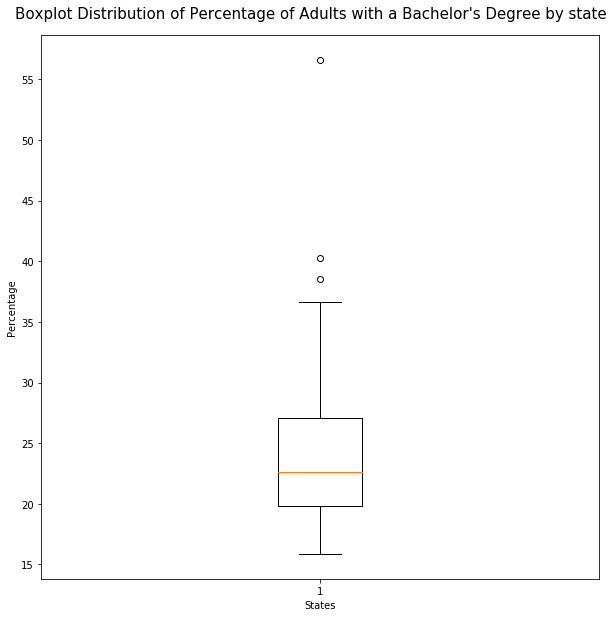

In [8]:
#Boxplot
fig = plt.figure(figsize=(10,10))
plt.boxplot(state_mean['Percent_Bachelors_Degree'])
plt.xlabel('States')
plt.ylabel('Percentage')
fig.suptitle("Boxplot Distribution of Percentage of Adults with a Bachelor's Degree by state", fontsize=15, y=0.92)

In [9]:
#There are 3 outliers
#Top cutoff point
np.percentile(state_mean['Percent_Bachelors_Degree'], q=75) + (np.percentile(state_mean['Percent_Bachelors_Degree'], q=75) - np.percentile(state_mean['Percent_Bachelors_Degree'], q=25)) *1.5

37.980898876404495

In [10]:
#Bottom cutoff point
#Doesn't match with the boxplot visually. I don't know where I made my mistake.
np.percentile(state_mean['Percent_Bachelors_Degree'], q=25) - (np.percentile(state_mean['Percent_Bachelors_Degree'], q=75) - np.percentile(state_mean['Percent_Bachelors_Degree'], q=25)) *1.5

8.965168539325841

Now, let's read in a dataset that tells us whether a particular state voted for Al Gore or George Bush in 2000.

In [11]:
votes_2016 = pd.read_excel('data/federalelections2016.xlsx', sheet_name=2, skiprows=3, skipfooter=7)
votes_2016.columns = ['State', 'Electoral_Trump', 'Electoral_Clinton', 'Popular_Trump', 'Popular_Clinton', 'Popular_Others', 'Total_Popular']
votes_2016.head()

,State,Electoral_Trump,Electoral_Clinton,Popular_Trump,Popular_Clinton,Popular_Others,Total_Popular
0,AL,9,NaN,1318255,729547,75570,2123372
1,AK,3,NaN,163387,116454,38767,318608
2,AZ,11,NaN,1252401,1161167,159597,2573165
3,AR,6,NaN,684872,380494,65310,1130676
4,CA,NaN,55,4483814,8753792,943998,14181604


And let's make a list of which states voted blue and voted red based on their electoral vote (note that Maine registered 3 votes for Clinton and 1 for Trump - we will count it as a blue state for this exercise)

In [12]:
blue_states = list(votes_2016[votes_2016['Electoral_Clinton'].notnull()]['State'])
red_states = list(votes_2016[votes_2016['Electoral_Trump'].notnull()]['State'])
#Remove Value from List
red_states.remove('ME')

Finally, we can get dataframes of the percentage of adults with a bachelor's degree for both blue states and red states.

In [13]:
blue_state_means = state_mean[state_mean['State'].isin(blue_states)]
red_state_means = state_mean[state_mean['State'].isin(red_states)]

5) Plot a boxplot showing blue states and red states (hint: you can plot two separate items in a boxplot by plotting an array, i.e. :  
plt.boxplot([df_a['a'], df_b['a'], labels=['a','b'])

Do blue states or red states have a higher mean % of bachelor degrees? What are the means of each? What is the mean difference between the two?

Do either groups of states have outliers? Which states are outliers?

{'whiskers': [<matplotlib.lines.Line2D at 0x7f43d0493518>,
 'caps': [<matplotlib.lines.Line2D at 0x7f43d053a898>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f43d03b37b8>,
 'medians': [<matplotlib.lines.Line2D at 0x7f43d053afd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f43d0473080>,
 'means': []}

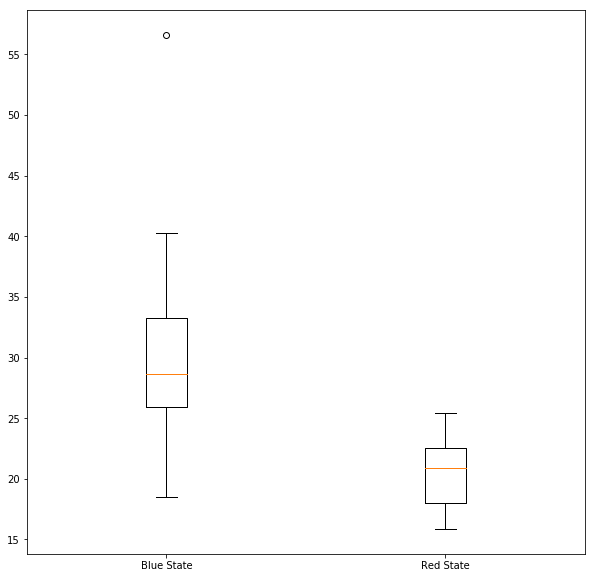

In [14]:
fig = plt.figure(figsize=(10,10))
plt.boxplot([blue_state_means['Percent_Bachelors_Degree'], red_state_means['Percent_Bachelors_Degree']], labels=['Blue State', 'Red State'])

In [15]:
#Blue states have higher means % of Bachelors Degree
blue_state_means.mean()

Percent_Bachelors_Degree    30.273896
dtype: float64

In [16]:
red_state_means.mean()

Percent_Bachelors_Degree    20.32047
dtype: float64

In [17]:
#Mean diff
blue_state_means.mean() - red_state_means.mean()

Percent_Bachelors_Degree    9.953426
dtype: float64

In [18]:
#BLue State has an outlier, Washington
np.max(blue_state_means)

State                         WA
Percent_Bachelors_Degree    56.6
dtype: object

6) Using the pooled variance function below, find the pooled variance and pooled standard deviation for the two groups of states.

In [19]:
def custom_pooled_variance(a, b):
    return ((((len(a) - 1) * np.var(a, ddof=1)) + ((len(b) - 1) * np.var(b, ddof=1))) / (len(a) + len(b) - 2)) * ((1/len(a)) + 1/len(b))

In [20]:
pooled_var = custom_pooled_variance(blue_state_means['Percent_Bachelors_Degree'], red_state_means['Percent_Bachelors_Degree'])
print('Pooled Variance:', np.round(pooled_var, 2))
print('Pooled Standard Deviation:', np.round(np.sqrt(pooled_var), 2))

Pooled Variance: 2.71
Pooled Standard Deviation: 1.65


7) Say that we want to see if the average percentage of adults with bachelor's degrees is higher in blue states than in red states. In this case, what is our null hypothesis and our alternate hypothesis?

H0: The average percentage of adults with bachelor's degrees in blue states and in red states are equal.
HA: The average percentage of adults with bachelor's degrees is higher in blue states than in red states.

8) Find the proper parameters for the T-distribution to test our null hypothesis. What is the mean, standard deviation, and degrees of freedom of our null hypothesis?

Mean: 0  
Standard Deviation: 1.65  
Degrees of Freedom: 49  

9) At a signifiance level of 0.05, what are the rejection region (s?) of our distribution? Make a plot highlighting these rejection region (s?) in red.

Rejection Region: Greater than 2.76


Text(0.5,0.92,'T-Distribution of Difference Between Samples')

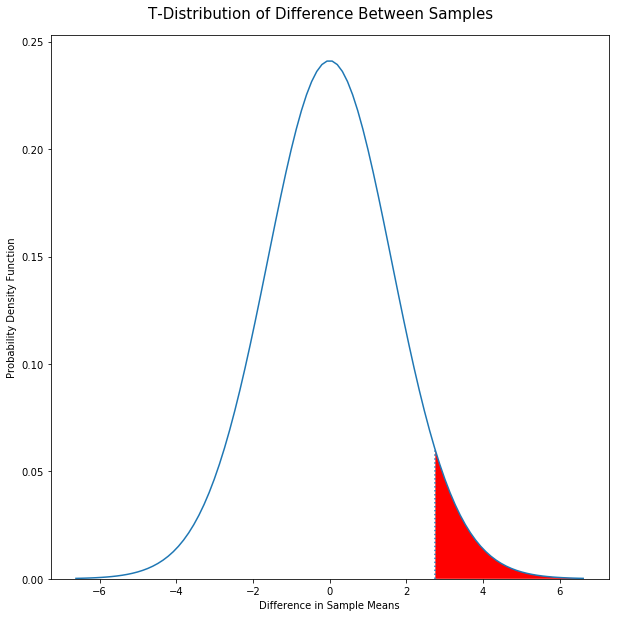

In [21]:
dist = stats.t(loc=0, scale=np.sqrt(pooled_var), df=49)
print('Rejection Region: Greater than', np.round(dist.ppf(0.95), 2))
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.plot([dist.ppf(0.95), dist.ppf(0.95)],[0, dist.pdf(dist.ppf(0.95))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.95), dist.ppf(0.9999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Difference in Sample Means')
plt.ylabel('Probability Density Function')
fig.suptitle('T-Distribution of Difference Between Samples', fontsize=15, y=0.92)

10) At a significance level of 0.05, can we reject the null hypothesis? What is the p-value of our observed difference?

In [22]:
#P-value
1 - dist.cdf(np.mean(blue_state_means['Percent_Bachelors_Degree']) - np.mean(red_state_means['Percent_Bachelors_Degree']))

9.885535501297227e-08

Yes, we can reject the null hypothesis, as the mean difference of 9.95 is much higher than the rejection cutoff of 2.76 and has a p-value of close to 0.

BONUS: 11) Now run a boostrapping example using 10,000 simulations. Use np.random.seed(42) to ensure consistency if you run again. Concatenate the blue states and red states, shuffle them, and then break out new blue states and red states, similar to what we did last week in class. Record the difference between the blue states and red states.

Plot a histogram of the 10,000 differences recorded. What is the average difference?

In [29]:
#Can't figure out mistake
#np.random.seed(42)
#diff = []
#for i in range(10000):
 #   total = blue_state_means['Percent_Bachelors_Degree'] + red_state_means['Percent_Bachelors_Degree']
  #  np.random.shuffle(total)
   # new_a = total[:len(blue_state_means['Percent_Bachelors_Degree'])]
    #new_b = total[len(blue_state_means['Percent_Bachelors_Degree']):]
    #diff.append(np.mean(new_a) - np.mean(new_b))

Text(0.5,0.92,'Bootstrap Distribution of Difference Between Samples')

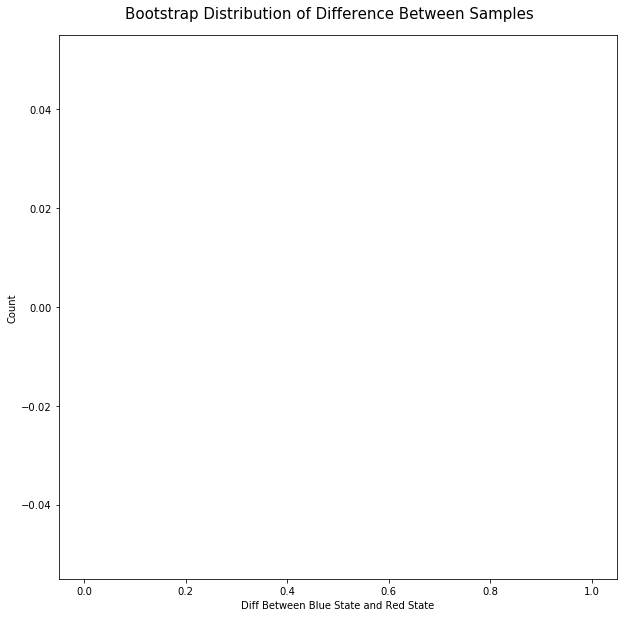

In [26]:
fig = plt.figure(figsize=(10,10))
plt.hist(diff, bins=50)
plt.xlabel('Diff Between Blue State and Red State')
plt.ylabel('Count')
fig.suptitle('Bootstrap Distribution of Difference Between Samples', fontsize=15, y=0.92)

BONUS: 12) At a signifiance level of 0.05, what are the rejection region (s?) of our distribution?

In [28]:
#np.percentile(diff, 95)

BONUS: 13) At a significance level of 0.05, can we reject the null hypothesis? What is the p-value of our observed difference?

In [25]:
1 - (0.01 * stats.percentileofscore(diff, np.mean(blue_state_means['Percent_Bachelors_Degree']) - np.mean(red_state_means['Percent_Bachelors_Degree'])))

0.0